# Time Series Modeling with Keras

- ~~Official Tutorial:~~
    - https://www.tensorflow.org/tutorials/structured_data/time_series
    
- Using the TimeSeriesGenerator
    - https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/
    
- Using Tensorflow 2.0's time series methods
    - https://keras.io/api/preprocessing/timeseries/

In [1]:
DOWNLOAD_DATA=False

In [2]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.2.27 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
import requests
import datetime as dt 
import glob,time,os
def download_stock_data(fpath='data/ive_minute_tick_bidask_API.csv',
                       verbose=True,append_date=True):
    """Downloads up-to-date IVE S&P 500 1-min aggregate data from 
    http://www.kibot.com/free_historical_data.aspx
    
    Args:
        fpath (str): csv filepath to save (Default='data/ive_minute_tick_bidask_API.csv')
        verbose (bool): Display file info (Default=True)
        
    Returns:
        stock_df: DataFrame with correct headers and datetime index"""
    agg_url = 'http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask1&bp=1&user=guest'
    response = requests.get(agg_url,
                            allow_redirects=True)

    ## Save output to csv file
    with open(fpath,'wb') as file:
        file.write(response.content)
        
        
    ## Load in Stock Data Frame with headers (then save)
    headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
    stock_df = pd.read_csv(fpath,names=headers)

# 
    ## Make Combined Date Time column and Drop Origs
    stock_df['datetime'] = pd.to_datetime(stock_df['Date'].astype(str)+' '+stock_df['Time'].astype(str))
    
    if append_date:
        suffix = dt.date.today().strftime('%m-%d-%y')
        fpath = f"{fpath.split('.csv')[0]}_{suffix}.csv"
        
    print(f'Saving as {fpath}')
    stock_df.to_csv(fpath,index=False)
        
    if verbose:
        print('[i] Stock data successfully downloaded and saved as:')
        print(' - ',fpath)
        
    return pd.read_csv(fpath,parse_dates=['datetime'],index_col='datetime')

In [4]:
## DOWNLOAD THE DATA IF REQUESTED
if DOWNLOAD_DATA:
    print('[i] Downoading data sets...')
    stock_df = download_stock_data()
    
else: 
    print('[i] Loading most recent data sets...')
    ## Get list of current csvs
    files_glob = glob.glob('data/*.csv')
    stock_files = list(filter(lambda x: 'ive_minute' in x, files_glob))


    ## make dictionaries of file date modifieds
    STOCK_FILES = {}
    for file in stock_files:
        STOCK_FILES[file] = pd.to_datetime(time.ctime(os.path.getmtime(file)))

        
    ## Get most recent files
    recent_stocks = pd.Series(STOCK_FILES).idxmax()
    
    ## Load in the csvs 
    stock_df = pd.read_csv(recent_stocks,parse_dates=['datetime'],index_col='datetime')
    
    ## Sort timeseries
    stock_df.sort_index(inplace=True)
    
## Display Preview of DFs
display(stock_df.head())#,tweets.head())

[i] Loading most recent data sets...


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30,39.06,39.06,39.06,39.06,39.13,39.13,39.13,39.13
2009-09-28 09:31:00,09/28/2009,09:31,39.10,39.10,39.08,39.09,39.11,39.11,39.10,39.11
2009-09-28 09:32:00,09/28/2009,09:32,39.11,39.15,39.11,39.15,39.12,39.16,39.12,39.16
2009-09-28 09:33:00,09/28/2009,09:33,39.14,39.14,39.14,39.14,39.15,39.16,39.15,39.15
2009-09-28 09:34:00,09/28/2009,09:34,39.14,39.14,39.12,39.12,39.15,39.15,39.14,39.14


In [5]:
stock_df

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30,39.06,39.06,39.06,39.06,39.13,39.13,39.13,39.13
2009-09-28 09:31:00,09/28/2009,09:31,39.10,39.10,39.08,39.09,39.11,39.11,39.10,39.11
2009-09-28 09:32:00,09/28/2009,09:32,39.11,39.15,39.11,39.15,39.12,39.16,39.12,39.16
2009-09-28 09:33:00,09/28/2009,09:33,39.14,39.14,39.14,39.14,39.15,39.16,39.15,39.15
2009-09-28 09:34:00,09/28/2009,09:34,39.14,39.14,39.12,39.12,39.15,39.15,39.14,39.14
...,...,...,...,...,...,...,...,...,...,...
2020-11-11 15:58:00,11/11/2020,15:58,122.06,122.12,122.06,122.12,122.07,122.14,122.07,122.13
2020-11-11 15:59:00,11/11/2020,15:59,122.10,122.11,122.06,122.09,122.12,122.15,122.07,122.13
2020-11-11 16:00:00,11/11/2020,16:00,122.11,122.17,122.11,122.17,122.17,122.42,122.17,122.42


In [6]:
import plotly.express as px

In [7]:
## Make stock_ts from bidclose
stock_ts = stock_df[['BidOpen','BidClose']]#.rename('price')
stock_ts

,BidOpen,BidClose
datetime,,
2009-09-28 09:30:00,39.06,39.06
2009-09-28 09:31:00,39.10,39.09
2009-09-28 09:32:00,39.11,39.15
2009-09-28 09:33:00,39.14,39.14
2009-09-28 09:34:00,39.14,39.12
...,...,...
2020-11-11 15:58:00,122.06,122.12
2020-11-11 15:59:00,122.10,122.09
2020-11-11 16:00:00,122.11,122.17


<AxesSubplot:xlabel='datetime'>

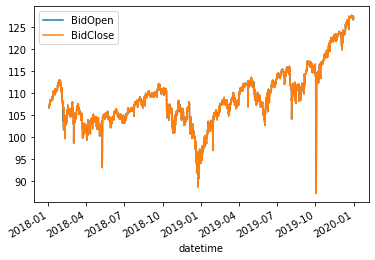

In [55]:
# stock_ts.columns = ['price']
## Replace 0 Values
stock_ts[stock_ts==0] = np.nan
stock_ts = stock_ts.ffill()

## Short time period
stock_ts = stock_ts.loc['2018':'2019']
stock_ts.plot()

In [56]:
import tensorflow  as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
tf.__version__

'2.3.1'

In [57]:
stock_ts

,BidOpen,BidClose
datetime,,
2018-01-02 09:29:00,106.59,106.59
2018-01-02 09:30:00,106.83,106.79
2018-01-02 09:31:00,106.78,106.80
2018-01-02 09:32:00,106.85,106.85
2018-01-02 09:33:00,106.85,106.78
...,...,...
2019-12-31 15:56:00,127.26,127.22
2019-12-31 15:57:00,127.18,127.17
2019-12-31 15:58:00,127.18,127.16


<AxesSubplot:xlabel='datetime'>

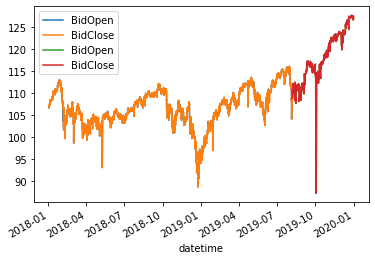

In [58]:
int_split = round(len(stock_ts)*.8)
train = stock_ts.iloc[:int_split]
test = stock_ts.iloc[int_split:]

fig,ax= plt.subplots()

train.plot(ax=ax)
test.plot(ax=ax)

In [59]:
# train['target'] = train['price'].shift(-1)
# test['target'] = test['price'].shift(-1)

# train

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)#['price'].values.reshape(-1,1))
X_test = scaler.transform(test)#['price'].values.reshape(-1,1))

X_train

array([[0.65631848, 0.65583942],
       [0.665084  , 0.66313869],
       [0.66325785, 0.66350365],
       ...,
       [0.73520818, 0.73467153],
       [0.73739956, 0.73430657],
       [0.7366691 , 0.73649635]])

<AxesSubplot:xlabel='datetime'>

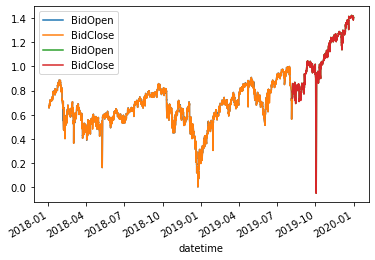

In [61]:
X_train = pd.DataFrame(X_train,index=train.index,columns=['BidOpen','BidClose'])
X_test = pd.DataFrame(X_test,index=test.index,columns=['BidOpen','BidClose'])

fig,ax= plt.subplots()
X_train.plot(ax=ax)
X_test.plot(ax=ax)

In [63]:
X_train.shape[1]

2

In [64]:
## Set the number of features in input sequences
n_features = X_train.shape[1]

series = X_train.values
series = series.reshape((len(series), n_features))
series

array([[0.65631848, 0.65583942],
       [0.665084  , 0.66313869],
       [0.66325785, 0.66350365],
       ...,
       [0.73520818, 0.73467153],
       [0.73739956, 0.73430657],
       [0.7366691 , 0.73649635]])

In [65]:
## Specifying the number of timesteps for the sequences
length=60

## Making the time series generator
timeseries_gen = TimeseriesGenerator(series,series[:,1],length,batch_size=64)
timeseries_gen

In [66]:
## Testing out an individual outpuyt from timeseries_gen
ex_X,ex_y =timeseries_gen[1]
ex_X.shape

(64, 60, 2)

In [67]:
## Making test data
test_series = X_test.values
test_series = test_series.reshape((len(test_series),n_features))
test_gen = TimeseriesGenerator(test_series,test_series[:,1],length,batch_size=64)


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2

input_shape=(length,n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50,  activation='relu',
                input_shape =input_shape,return_sequences=False))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss='mse', metrics=['mse'],
              optimizer=optimizers.Adam())

display(model1.summary())
history = model1.fit(timeseries_gen,epochs=3)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/3
2151/2151 [==============================] - 42s 20ms/step - loss: 7.4202e-04 - mse: 7.4202e-04
Epoch 2/3
2151/2151 [==============================] - 38s 18ms/step - loss: 2.7225e-05 - mse: 2.7225e-05
Epoch 3/3
2151/2151 [==============================] - 35s 16ms/step - loss: 3.2453e-05 - mse: 3.2453e-05


In [69]:
results= pd.DataFrame(history.history)
results

,loss,mse
0,0.000742,0.000742
1,0.000027,0.000027
2,0.000032,0.000032


In [70]:
y_hat_test = model1.predict(test_gen)

In [81]:
X_test

,BidOpen,BidClose
datetime,,
2019-08-07 12:25:00,0.737400,0.736496
2019-08-07 12:26:00,0.737400,0.734672
2019-08-07 12:27:00,0.738495,0.737956
2019-08-07 12:28:00,0.740321,0.739781
2019-08-07 12:29:00,0.740687,0.740146
...,...,...
2019-12-31 15:56:00,1.411249,1.408759
2019-12-31 15:57:00,1.408327,1.406934
2019-12-31 15:58:00,1.408327,1.406569


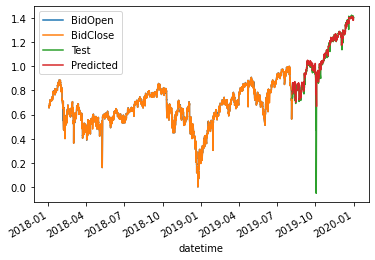

In [83]:
fig,ax = plt.subplots()
X_train.plot(ax=ax)
X_test['BidClose'].plot(ax=ax,label='Test')
ax.plot(X_test[length:].index,y_hat_test.flatten(),label='Predicted')
ax.legend()